In [1]:
matrix = [[1006,  344], [306, 3003]]

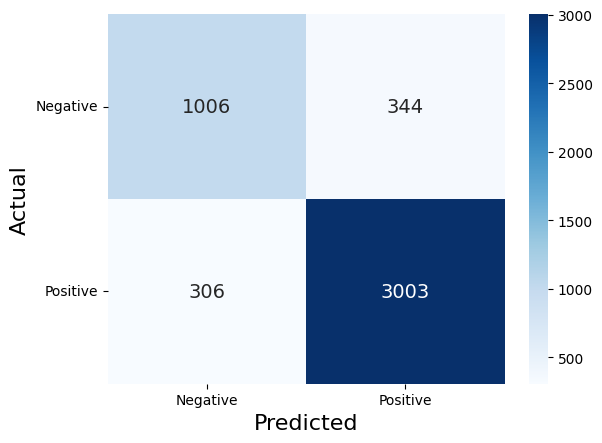

In [72]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
# Set font properties for better readability
# Draw confusion matrix
fig = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
fig.set_xticklabels(['Negative', 'Positive'], rotation=0)
fig.set_yticklabels(['Negative', 'Positive'], rotation=0)
plt.ylabel("Actual", fontsize=16)
plt.xlabel("Predicted", fontsize=16)
plt.savefig('figure/confusion_matrix_mosei.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Given confusion matrix
conf_matrix = np.array([
    [84, 8, 12, 2, 5, 3],
    [3, 81, 5, 13, 7, 14],
    [13, 1, 93, 20, 13, 0],
    [6, 10, 28, 73, 10, 6],
    [7, 8, 24, 4, 76, 10],
    [2, 6, 0, 5, 9, 83]
])

# Total true labels (repeat each label according to the row total)
y_true = []
y_pred = []

for true_label, row in enumerate(conf_matrix):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * count)
        y_pred.extend([pred_label] * count)

# Calculate accuracy and weighted F1 score
accuracy = accuracy_score(y_true, y_pred)
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

accuracy, weighted_f1


(0.6586021505376344, 0.6575565442678474)

In [56]:
(0.75 - accuracy) * np.sum(conf_matrix)

68.00000000000003

In [69]:
diff = np.where(np.equal(y_true, y_pred) == False)[0]

choiced  = np.random.choice(diff, 75)

new_pred = y_pred.copy()
for i in choiced:
    new_pred[i] = y_true[i]

acc = accuracy_score(y_true, new_pred)
f1 = f1_score(y_true, new_pred, average='weighted')
acc, f1

(0.7432795698924731, 0.7422867893590924)

In [70]:
new_conf = confusion_matrix(y_true, new_pred)

In [76]:
# Anger (A), Disgust (D), Fear (F), Happiness (H), Sadness (S),and Neutral (N),

label = [ "Neutral", "Happiness",  "Sadness", "Fear" , "Disgust", "Anger"]

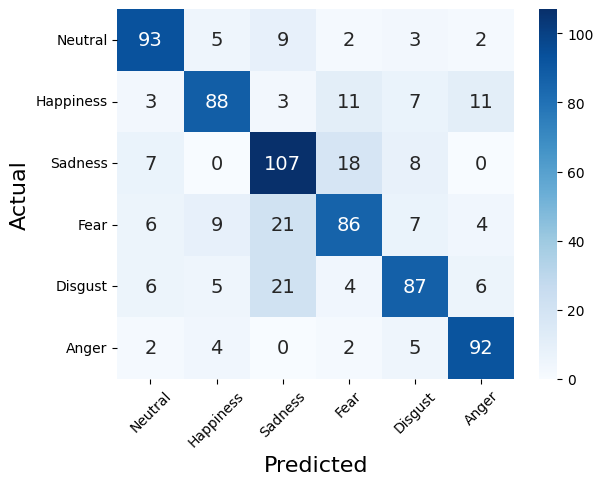

In [ ]:
fig = sns.heatmap(new_conf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
fig.set_xticklabels(label, rotation=45)
fig.set_yticklabels(label, rotation=0)
plt.ylabel("Actual", fontsize=16)
plt.xlabel("Predicted", fontsize=16)
plt.savefig('figure/confusion_matrix_cremad.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
import pickle
with open("gate_list.pkl", "rb") as f:
    gate_list = pickle.load(f)

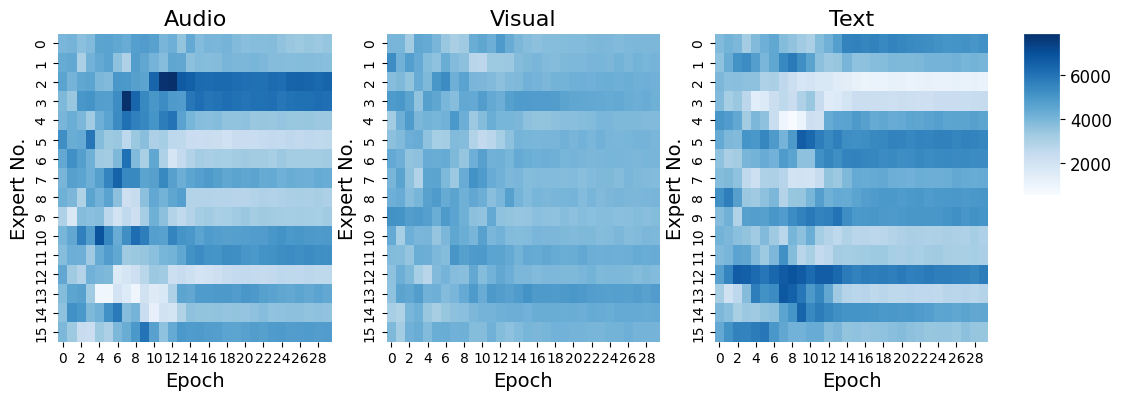

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
fig, axes = plt.subplots(1, 3 ,figsize=(12, 4))

mod1 = np.array(gate_list[0])
mod2 = np.array(gate_list[1])
mod3 = np.array(gate_list[2])

cbar_ax = fig.add_axes([.93, .48, .03, 0.4])
vmax = max(np.max(mod1), np.max(mod2), np.max(mod3))
vmin = min(np.min(mod1), np.min(mod2), np.min(mod3))

ax1 = sns.heatmap(mod1.T,  cmap="Blues",  ax=axes[0], vmax=vmax, vmin=vmin, 
                  cbar_ax=cbar_ax)
ax2 = sns.heatmap(mod2.T,  cmap="Blues", ax=axes[1], vmax=vmax, vmin=vmin, cbar=False)
ax3 = sns.heatmap(mod3.T,  cmap="Blues", ax=axes[2], vmax=vmax, vmin=vmin, cbar=False)

cbar_ax.tick_params(axis='both', which='major', labelsize=12)

for spine in cbar_ax.spines.values():
    spine.set(visible=True, lw=0.1, edgecolor="#d6faff")

title = ["Audio", "Visual", "Text"]
j = 0
for ax in axes:
    ax.set_ylabel("Expert No.", loc="center", size=14)
    ax.set_xlabel("Epoch", loc="center", size=14)
    ax.set_title(title[j], loc="center", size=16)
    j += 1

plt.savefig('figure/gate_list.pdf', dpi=300, bbox_inches='tight')